In [1]:
import numpy as np
from sklearn import svm

## Tratamento para N3 e S3 que tem dimensões diferentes

In [6]:
n3 = np.loadtxt("n3.dat")
n3.shape

(24, 6145)

In [7]:
n3 = n3[:, 1025:6145]

In [8]:
n3.shape

(24, 5120)

## Analise dos Dados

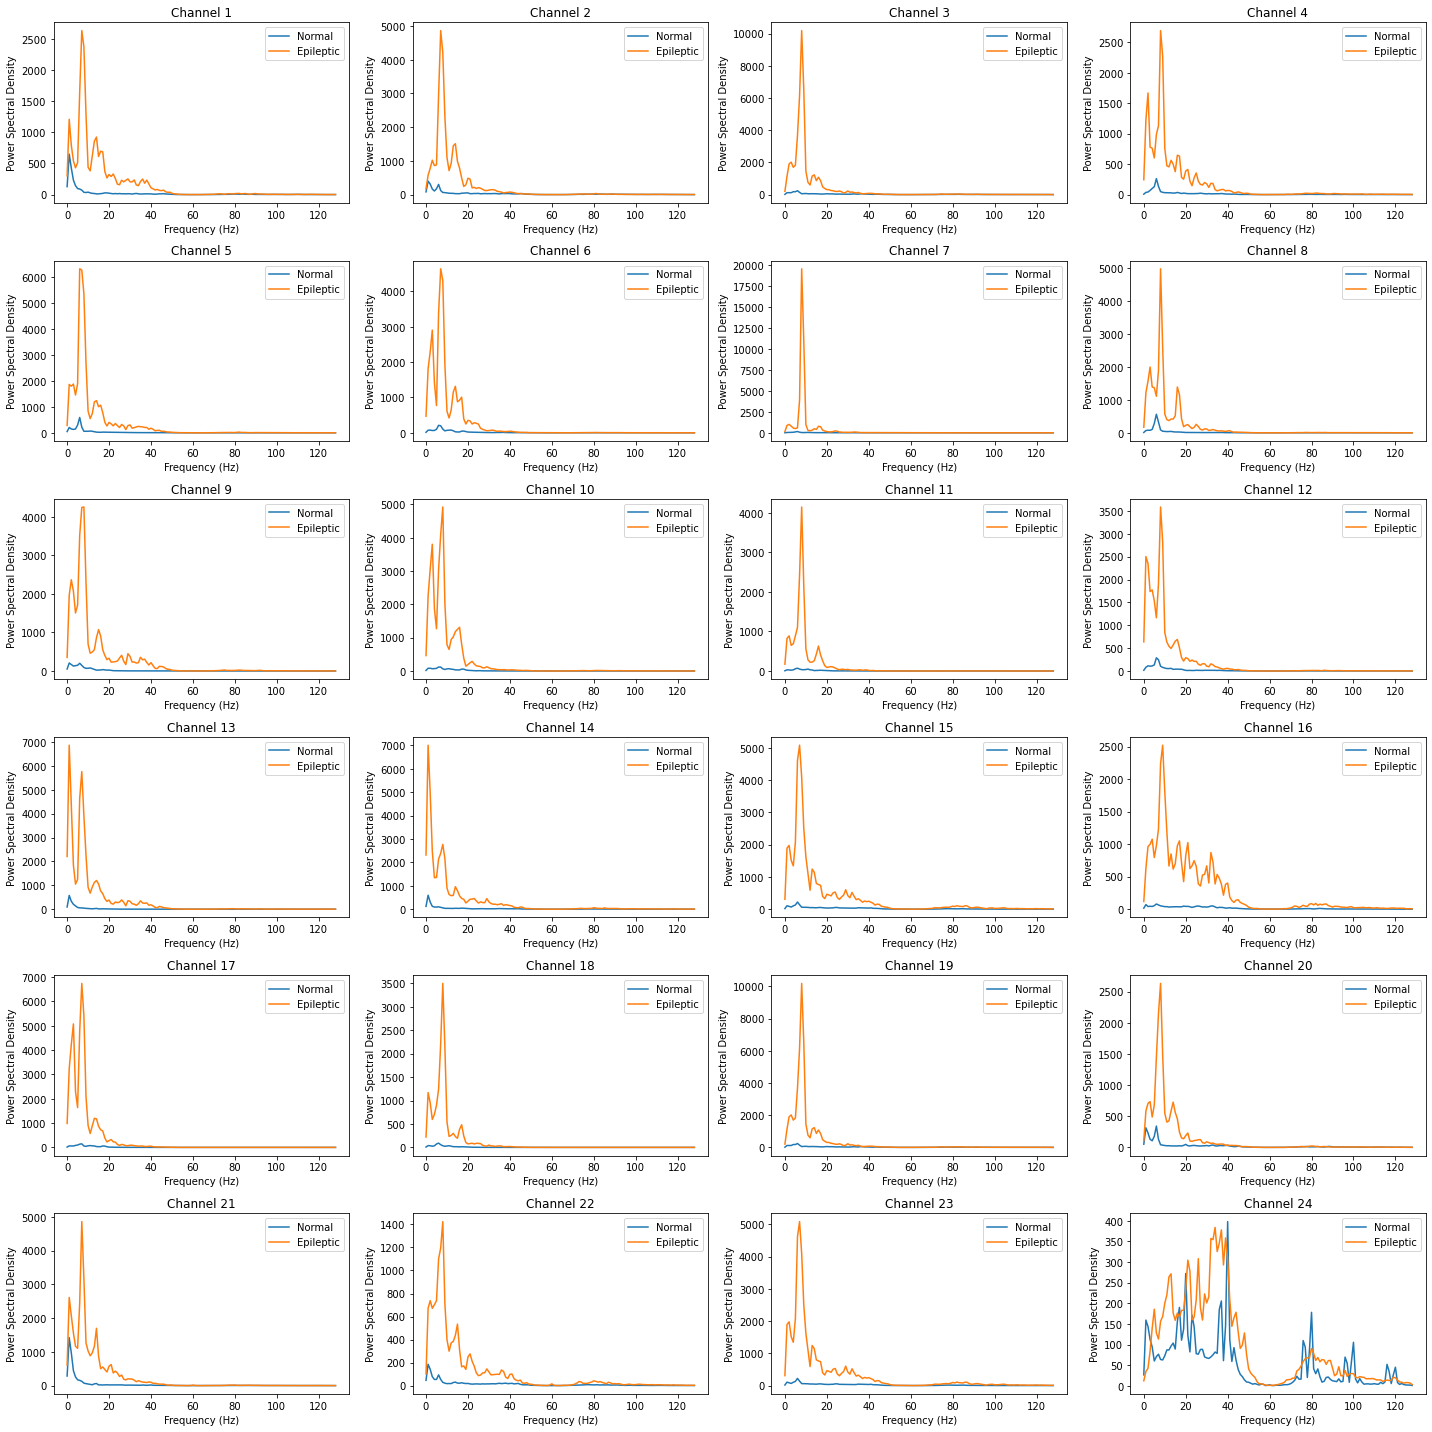

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Carregar os dados de treinamento normais
n1 = np.loadtxt("n1.dat")
n2 = np.loadtxt("n2.dat")
#n3 = np.loadtxt("n3_padded.dat")
n4 = np.loadtxt("n4.dat")
n5 = np.loadtxt("n5.dat")

# Carregar os dados de treinamento epilépticos
s1 = np.loadtxt("s1.dat")
s2 = np.loadtxt("s2.dat")
#s3 = np.loadtxt("s3_padded.dat")
s4 = np.loadtxt("s4.dat")
s5 = np.loadtxt("s5.dat")

n3 = np.loadtxt("n3.dat")
n3 = n3[:, 1025:6145]
s3 = np.loadtxt("s3.dat")
s3 = s3[:, 1025:6145]


# Definir os parâmetros
sampling_rate = 256
n_channels = 24

# Calcular o PSD para os dados normais
frequencies_n, psd_n = signal.welch(np.concatenate((n1, n2, n3, n4, n5)), fs=sampling_rate, nperseg=256)

# Calcular o PSD para os dados epilépticos
frequencies_s, psd_s = signal.welch(np.concatenate((s1, s2, s3, s4, s5)), fs=sampling_rate, nperseg=256)

# Plotar o PSD
plt.figure(figsize=(20, 20))
for channel in range(n_channels):
    plt.subplot(6, 4, channel+1)
    plt.plot(frequencies_n, psd_n[channel], label='Normal')
    plt.plot(frequencies_s, psd_s[channel], label='Epileptic')
    plt.title('Channel {}'.format(channel+1))
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power Spectral Density')
    plt.legend()
plt.tight_layout()
plt.savefig("fig_normal_ep.png")
plt.show()


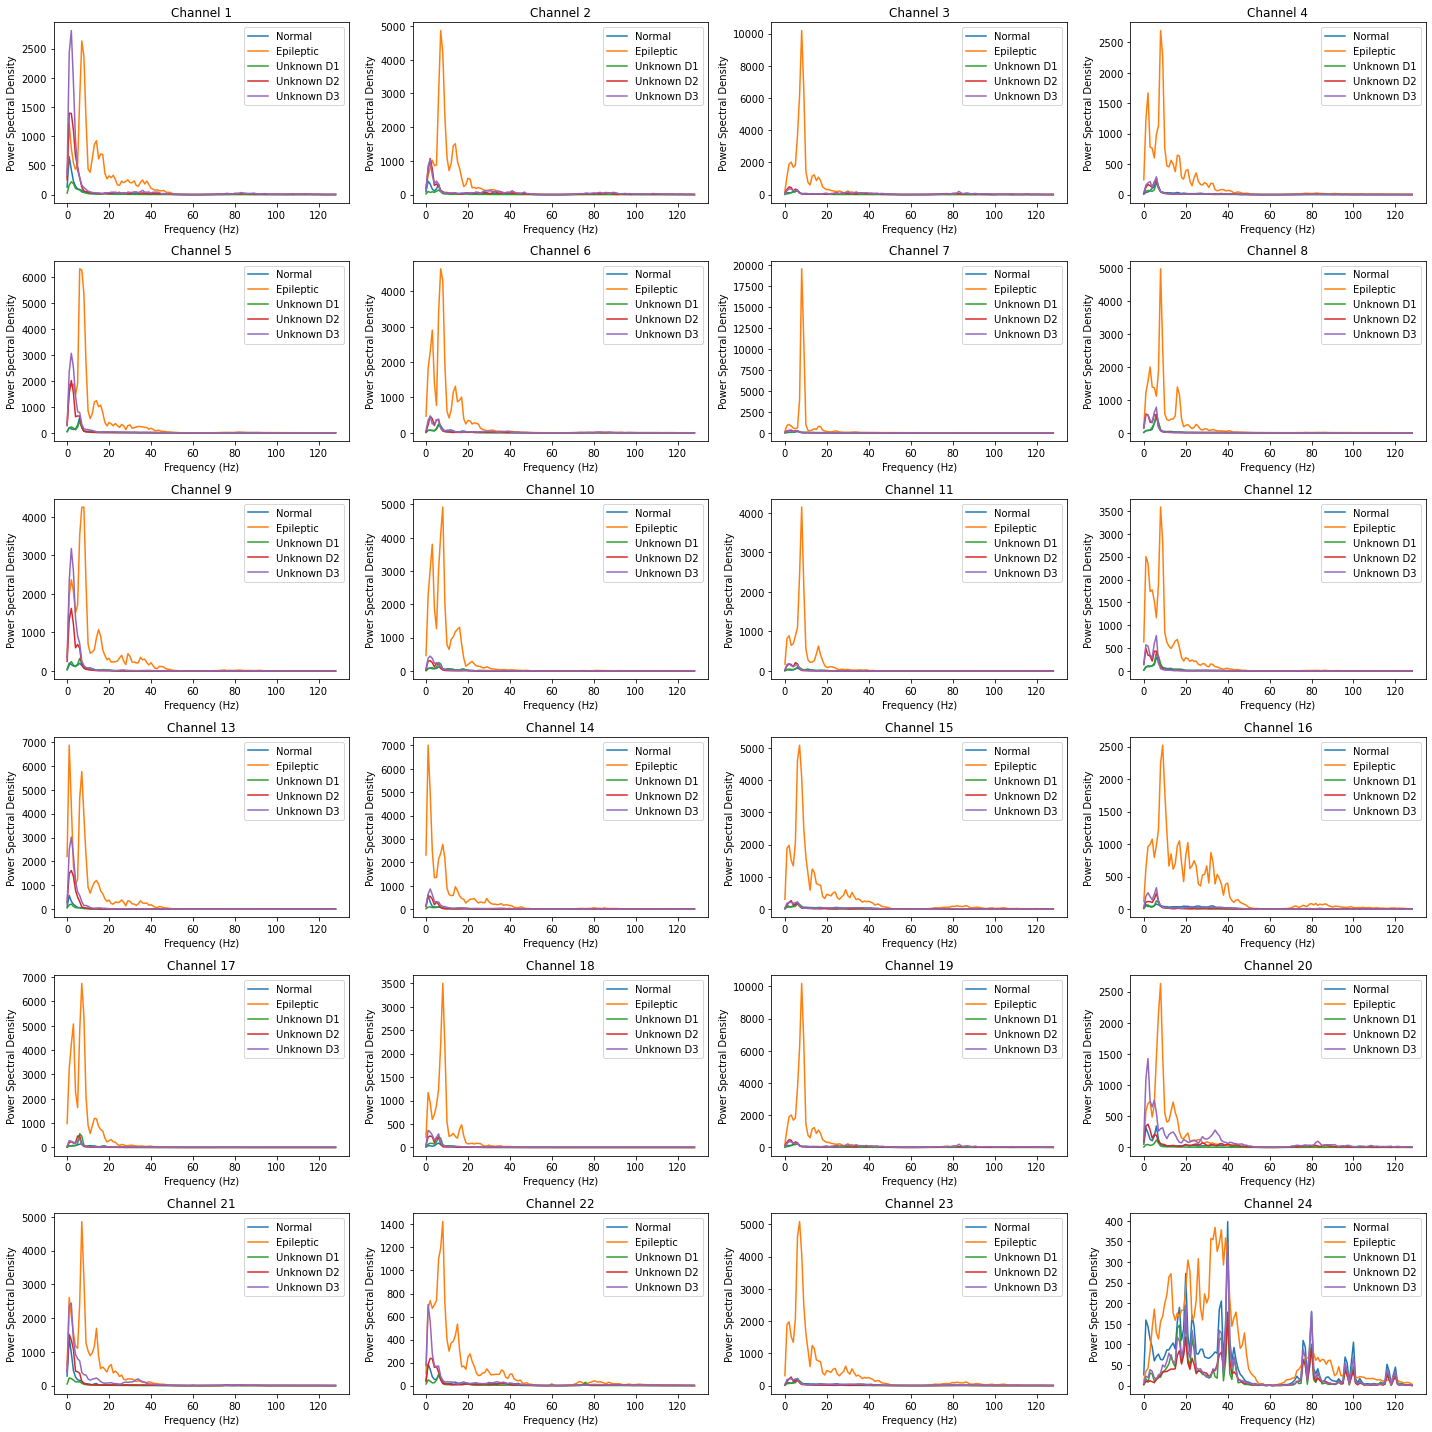

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Carregar os dados de treinamento normais
n1 = np.loadtxt("n1.dat")
n2 = np.loadtxt("n2.dat")
n4 = np.loadtxt("n4.dat")
n5 = np.loadtxt("n5.dat")

# Carregar os dados de treinamento epilépticos
s1 = np.loadtxt("s1.dat")
s2 = np.loadtxt("s2.dat")
s4 = np.loadtxt("s4.dat")
s5 = np.loadtxt("s5.dat")

# Carregar os dados desconhecidos
d1 = np.loadtxt("d1.dat")
d2 = np.loadtxt("d2.dat")
d3 = np.loadtxt("d3.dat")

n3 = np.loadtxt("n3.dat")
n3 = n3[:, 1025:6145]
s3 = np.loadtxt("s3.dat")
s3 = s3[:, 1025:6145]


# Definir os parâmetros
sampling_rate = 256
n_channels = 24

# Calcular o PSD para os dados normais
frequencies_n, psd_n = signal.welch(np.concatenate((n1, n2, n3, n4, n5)), fs=sampling_rate, nperseg=256)

# Calcular o PSD para os dados epilépticos
frequencies_s, psd_s = signal.welch(np.concatenate((s1, s2, s3, s4, s5)), fs=sampling_rate, nperseg=256)

# Calcular o PSD para os dados desconhecidos
frequencies_d1, psd_d1 = signal.welch(d1, fs=sampling_rate, nperseg=256)
frequencies_d2, psd_d2 = signal.welch(d2, fs=sampling_rate, nperseg=256)
frequencies_d3, psd_d3 = signal.welch(d3, fs=sampling_rate, nperseg=256)

# Plotar o PSD
plt.figure(figsize=(20, 20))
for channel in range(n_channels):
    plt.subplot(6, 4, channel+1)
    plt.plot(frequencies_n, psd_n[channel], label='Normal')
    plt.plot(frequencies_s, psd_s[channel], label='Epileptic')
    plt.plot(frequencies_d1, psd_d1[channel], label='Unknown D1')
    plt.plot(frequencies_d2, psd_d2[channel], label='Unknown D2')
    plt.plot(frequencies_d3, psd_d3[channel], label='Unknown D3')
    plt.title('Channel {}'.format(channel+1))
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power Spectral Density')
    plt.legend()
plt.tight_layout()
plt.savefig("fig_com_desc_label.png")
plt.show()


## SVM

In [18]:
import numpy as np
from sklearn import svm
import pandas as pd
from sklearn.model_selection import train_test_split

# Carregar os dados de treinamento normais
n1 = np.loadtxt("n1.dat")
n2 = np.loadtxt("n2.dat")
# n3 = np.loadtxt("n3_padded.dat")
n4 = np.loadtxt("n4.dat")
n5 = np.loadtxt("n5.dat")

# Carregar os dados de treinamento epilépticos
s1 = np.loadtxt("s1.dat")
s2 = np.loadtxt("s2.dat")
# s3 = np.loadtxt("s3_padded.dat")
s4 = np.loadtxt("s4.dat")
s5 = np.loadtxt("s5.dat")

n3 = np.loadtxt("n3.dat")
n3 = n3[:, 1025:6145]
s3 = np.loadtxt("s3.dat")
s3 = s3[:, 1025:6145]

# Criar os rótulos para os dados de treinamento
y_normal = np.zeros(len(n1) + len(n2) + len(n3) + len(n4) + len(n5))
y_epileptic = np.ones(len(s1) + len(s2) + len(s3) + len(s4) + len(s5))

# Concatenar os dados de treinamento
X_train = np.concatenate((n1, n2, n3, n4, n5, s1, s2, s3, s4, s5))
y_train = np.concatenate((y_normal, y_epileptic))

# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Criar o classificador SVM
clf = svm.SVC()

# Treinar o classificador SVM
clf.fit(X_train, y_train)

# Carregar os dados desconhecidos
d1 = np.loadtxt("d1.dat")
d2 = np.loadtxt("d2.dat")
d3 = np.loadtxt("d3.dat")

# Realizar a classificação dos dados desconhecidos
pred1 = clf.predict(d1)
pred2 = clf.predict(d2)
pred3 = clf.predict(d3)

# Imprimir as previsões
list_pred1_svm = []
for value in pred1:
    if value == 0:
        list_pred1_svm.append("normal")
    else:
        list_pred1_svm.append("epileptico")
list_pred2_svm = []
for value in pred2:
    if value == 0:
        list_pred2_svm.append("normal")
    else:
        list_pred2_svm.append("epileptico")
list_pred3_svm = []
for value in pred3:
    if value == 0:
        list_pred3_svm.append("normal")
    else:
        list_pred3_svm.append("epileptico")

# Converter as previsões em valores numéricos (0 para normal e 1 para epiléptico)
list_pred1_svm = pred1.tolist()
list_pred2_svm = pred2.tolist()
list_pred3_svm = pred3.tolist()

# Criar DataFrame para comparar as previsões
df = pd.DataFrame({
    'Prediction_D1': list_pred1_svm,
    'Prediction_D2': list_pred2_svm,
    'Prediction_D3': list_pred3_svm
})

# Mapear os valores numéricos de volta para as strings 'normal' e 'epiléptico'
df.replace({0: 'normal', 1: 'epiléptico'}, inplace=True)

# Avaliar o desempenho do modelo nos dados de teste
accuracy = clf.score(X_test, y_test)
print("Acurácia no conjunto de teste:", accuracy)

# Exibir DataFrame
df


Acurácia no conjunto de teste: 0.7708333333333334


,Prediction_D1,Prediction_D2,Prediction_D3
0,normal,normal,normal
1,normal,normal,normal
2,normal,normal,normal
3,normal,normal,normal
4,normal,normal,epiléptico
5,normal,normal,normal
6,normal,normal,normal
7,normal,normal,normal
8,normal,normal,epiléptico
9,normal,normal,normal


### NCCD

In [14]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

# Carregar os dados de treinamento normais
n1 = np.loadtxt("n1.dat")
n2 = np.loadtxt("n2.dat")
#n3 = np.loadtxt("n3.dat")
n4 = np.loadtxt("n4.dat")
n5 = np.loadtxt("n5.dat")

# Carregar os dados de treinamento epilépticos
s1 = np.loadtxt("s1.dat")
s2 = np.loadtxt("s2.dat")
#s3 = np.loadtxt("s3.dat")
s4 = np.loadtxt("s4.dat")
s5 = np.loadtxt("s5.dat")

n3 = np.loadtxt("n3.dat")
n3 = n3[:, 1025:6145]
s3 = np.loadtxt("s3.dat")
s3 = s3[:, 1025:6145]

# Criar os rótulos para os dados de treinamento
y_normal = np.zeros(len(n1) + len(n2) + len(n3) + len(n4) + len(n5))
y_epileptic = np.ones(len(s1) + len(s2) + len(s3) + len(s4) + len(s5))


# Concatenar os dados de treinamento
X = np.concatenate((n1, n2, n3, n4, n5, s1, s2, s3, s4, s5))
y = np.concatenate((y_normal, y_epileptic))

# Realizar o agrupamento dos dados não convulsivos
k = 3  # Número de clusters (pode ser ajustado)
kmeans = KMeans(n_clusters=k)
non_epileptic_data = np.concatenate((n1, n2, n3, n4, n5))
kmeans.fit(non_epileptic_data)
non_epileptic_centroids = kmeans.cluster_centers_

# Dividir os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar o classificador SVM
clf = svm.SVC()

# Treinar o classificador SVM
clf.fit(X_train, y_train)

# Carregar os dados desconhecidos
d1 = np.loadtxt("d1.dat")
d2 = np.loadtxt("d2.dat")
d3 = np.loadtxt("d3.dat")

# Calcular as distâncias aos centroides não convulsivos
distances_d1 = cdist(d1, non_epileptic_centroids, 'euclidean')
distances_d2 = cdist(d2, non_epileptic_centroids, 'euclidean')
distances_d3 = cdist(d3, non_epileptic_centroids, 'euclidean')

# Realizar a classificação dos dados desconhecidos
pred1 = clf.predict(d1)
pred2 = clf.predict(d2)
pred3 = clf.predict(d3)

print("pred1", pred1)
print("pred2", pred2)
print("pred3", pred3)

# Imprimir as previsões
list_pred1_nccd = []
for value in pred1:
    if value == 0:
        list_pred1_nccd.append("normal")
    else:
        list_pred1_nccd.append("epileptico")
list_pred2_nccd = []
for value in pred2:
    if value == 0:
        list_pred2_nccd.append("normal")
    else:
        list_pred2_nccd.append("epileptico")
list_pred3_nccd = []
for value in pred3:
    if value == 0:
        list_pred3_nccd.append("normal")
    else:
        list_pred3_nccd.append("epileptico")
        
# Converter as previsões em valores numéricos (0 para normal e 1 para epiléptico)
list_pred1_nccd = pred1.tolist()
list_pred2_nccd = pred2.tolist()
list_pred3_nccd = pred3.tolist()

# Criar DataFrame para comparar as previsões
df = pd.DataFrame({
    'Prediction_D1': list_pred1_nccd,
    'Prediction_D2': list_pred2_nccd,
    'Prediction_D3': list_pred3_nccd
})

# Mapear os valores numéricos de volta para as strings 'normal' e 'epiléptico'
df.replace({0: 'normal', 1: 'epiléptico'}, inplace=True)

# Avaliar o desempenho do modelo nos dados de teste
accuracy = clf.score(X_test, y_test)
print("Acurácia no conjunto de teste:", accuracy)

df


pred1 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
pred2 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
pred3 [0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Acurácia no conjunto de teste: 0.7708333333333334


,Prediction_D1,Prediction_D2,Prediction_D3
0,normal,normal,normal
1,normal,normal,normal
2,normal,normal,normal
3,normal,normal,normal
4,normal,normal,epiléptico
5,normal,normal,normal
6,normal,normal,normal
7,normal,normal,normal
8,normal,normal,epiléptico
9,normal,normal,normal


## DCC

In [15]:
import numpy as np
from sklearn import svm
from scipy.spatial.distance import cdist

# Carregar os dados de treinamento normais
n1 = np.loadtxt("n1.dat")
n2 = np.loadtxt("n2.dat")
#n3 = np.loadtxt("n3.dat")
n4 = np.loadtxt("n4.dat")
n5 = np.loadtxt("n5.dat")

# Carregar os dados de treinamento epilépticos
s1 = np.loadtxt("s1.dat")
s2 = np.loadtxt("s2.dat")
#s3 = np.loadtxt("s3.dat")
s4 = np.loadtxt("s4.dat")
s5 = np.loadtxt("s5.dat")

n3 = np.loadtxt("n3.dat")
n3 = n3[:, 1025:6145]
s3 = np.loadtxt("s3.dat")
s3 = s3[:, 1025:6145]

# Criar os rótulos para os dados de treinamento
y_normal = np.zeros(len(n1) + len(n2) + len(n3) + len(n4) + len(n5))
y_epileptic = np.ones(len(s1) + len(s2) + len(s3) + len(s4) + len(s5))

# Concatenar os dados de treinamento
X_train = np.concatenate((n1, n2, n3, n4, n5, s1, s2, s3, s4, s5))
y_train = np.concatenate((y_normal, y_epileptic))

# Realizar o agrupamento dos dados não convulsivos
k = 3  # Número de clusters (pode ser ajustado)
kmeans = KMeans(n_clusters=k)
epileptic_data = np.concatenate((s1, s2, s3, s4, s5))
kmeans.fit(epileptic_data)
epileptic_centroids = kmeans.cluster_centers_

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar o classificador SVM
clf = svm.SVC()

# Treinar o classificador SVM
clf.fit(X_train, y_train)

# Carregar os dados desconhecidos
d1 = np.loadtxt("d1.dat")
d2 = np.loadtxt("d2.dat")
d3 = np.loadtxt("d3.dat")

# Calcular as distâncias aos centroides não convulsivos
distances_d1 = cdist(d1, epileptic_centroids, 'euclidean')
distances_d2 = cdist(d2, epileptic_centroids, 'euclidean')
distances_d3 = cdist(d3, epileptic_centroids, 'euclidean')

# Realizar a classificação dos dados desconhecidos
pred1 = clf.predict(d1)
pred2 = clf.predict(d2)
pred3 = clf.predict(d3)

print("pred1", pred1)
print("pred2", pred2)
print("pred3", pred3)
# Imprimir as previsões
list_pred1_dcc = []
for value in pred1:
    if value == 0:
        list_pred1_dcc.append("normal")
    else:
        list_pred1_dcc.append("epileptico")
list_pred2_dcc = []
for value in pred2:
    if value == 0:
        list_pred2_dcc.append("normal")
    else:
        list_pred2_dcc.append("epileptico")
list_pred3_dcc = []
for value in pred3:
    if value == 0:
        list_pred3_dcc.append("normal")
    else:
        list_pred3_dcc.append("epileptico")
        
# Converter as previsões em valores numéricos (0 para normal e 1 para epiléptico)
list_pred1_dcc = pred1.tolist()
list_pred2_dcc = pred2.tolist()
list_pred3_dcc = pred3.tolist()

# Criar DataFrame para comparar as previsões
df = pd.DataFrame({
    'Prediction_D1': list_pred1_dcc,
    'Prediction_D2': list_pred2_dcc,
    'Prediction_D3': list_pred3_dcc
})

# Mapear os valores numéricos de volta para as strings 'normal' e 'epiléptico'
df.replace({0: 'normal', 1: 'epiléptico'}, inplace=True)

# Avaliar o desempenho do modelo nos dados de teste
accuracy = clf.score(X_test, y_test)
print("Acurácia no conjunto de teste:", accuracy)

df


pred1 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
pred2 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
pred3 [0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Acurácia no conjunto de teste: 0.7708333333333334


,Prediction_D1,Prediction_D2,Prediction_D3
0,normal,normal,normal
1,normal,normal,normal
2,normal,normal,normal
3,normal,normal,normal
4,normal,normal,epiléptico
5,normal,normal,normal
6,normal,normal,normal
7,normal,normal,normal
8,normal,normal,epiléptico
9,normal,normal,normal


## Results

In [121]:
import pandas as pd
df = pd.DataFrame({
    'SVM_Prediction_1': list_pred1_svm,
    'DCC_Prediction_1': list_pred1_dcc,
    'NCCD_Prediction_1': list_pred1_nccd,
    "blank1": "|",
    'SVM_Prediction_2': list_pred2_svm,
    'DCC_Prediction_2': list_pred2_dcc,
    'NCCD_Prediction_2': list_pred2_nccd,
    "blank2": "|",
    'SVM_Prediction_3': list_pred3_svm,
    'DCC_Prediction_3': list_pred3_dcc,
    'NCCD_Prediction_3': list_pred3_nccd
})
df

,SVM_Prediction_1,DCC_Prediction_1,NCCD_Prediction_1,blank1,SVM_Prediction_2,DCC_Prediction_2,NCCD_Prediction_2,blank2,SVM_Prediction_3,DCC_Prediction_3,NCCD_Prediction_3
0,0.0,0.0,0.0,|,0.0,0.0,0.0,|,1.0,1.0,1.0
1,0.0,0.0,0.0,|,0.0,0.0,0.0,|,0.0,0.0,0.0
2,0.0,0.0,0.0,|,0.0,0.0,0.0,|,0.0,0.0,0.0
3,0.0,0.0,0.0,|,0.0,0.0,0.0,|,0.0,0.0,0.0
4,0.0,0.0,0.0,|,1.0,1.0,1.0,|,1.0,1.0,1.0
5,0.0,0.0,0.0,|,0.0,0.0,0.0,|,0.0,0.0,0.0
6,0.0,0.0,0.0,|,0.0,0.0,0.0,|,0.0,0.0,0.0
7,0.0,0.0,0.0,|,0.0,0.0,0.0,|,0.0,0.0,0.0
8,0.0,0.0,0.0,|,0.0,0.0,0.0,|,1.0,1.0,1.0
9,0.0,0.0,0.0,|,0.0,0.0,0.0,|,0.0,0.0,0.0


## Autocorrelação

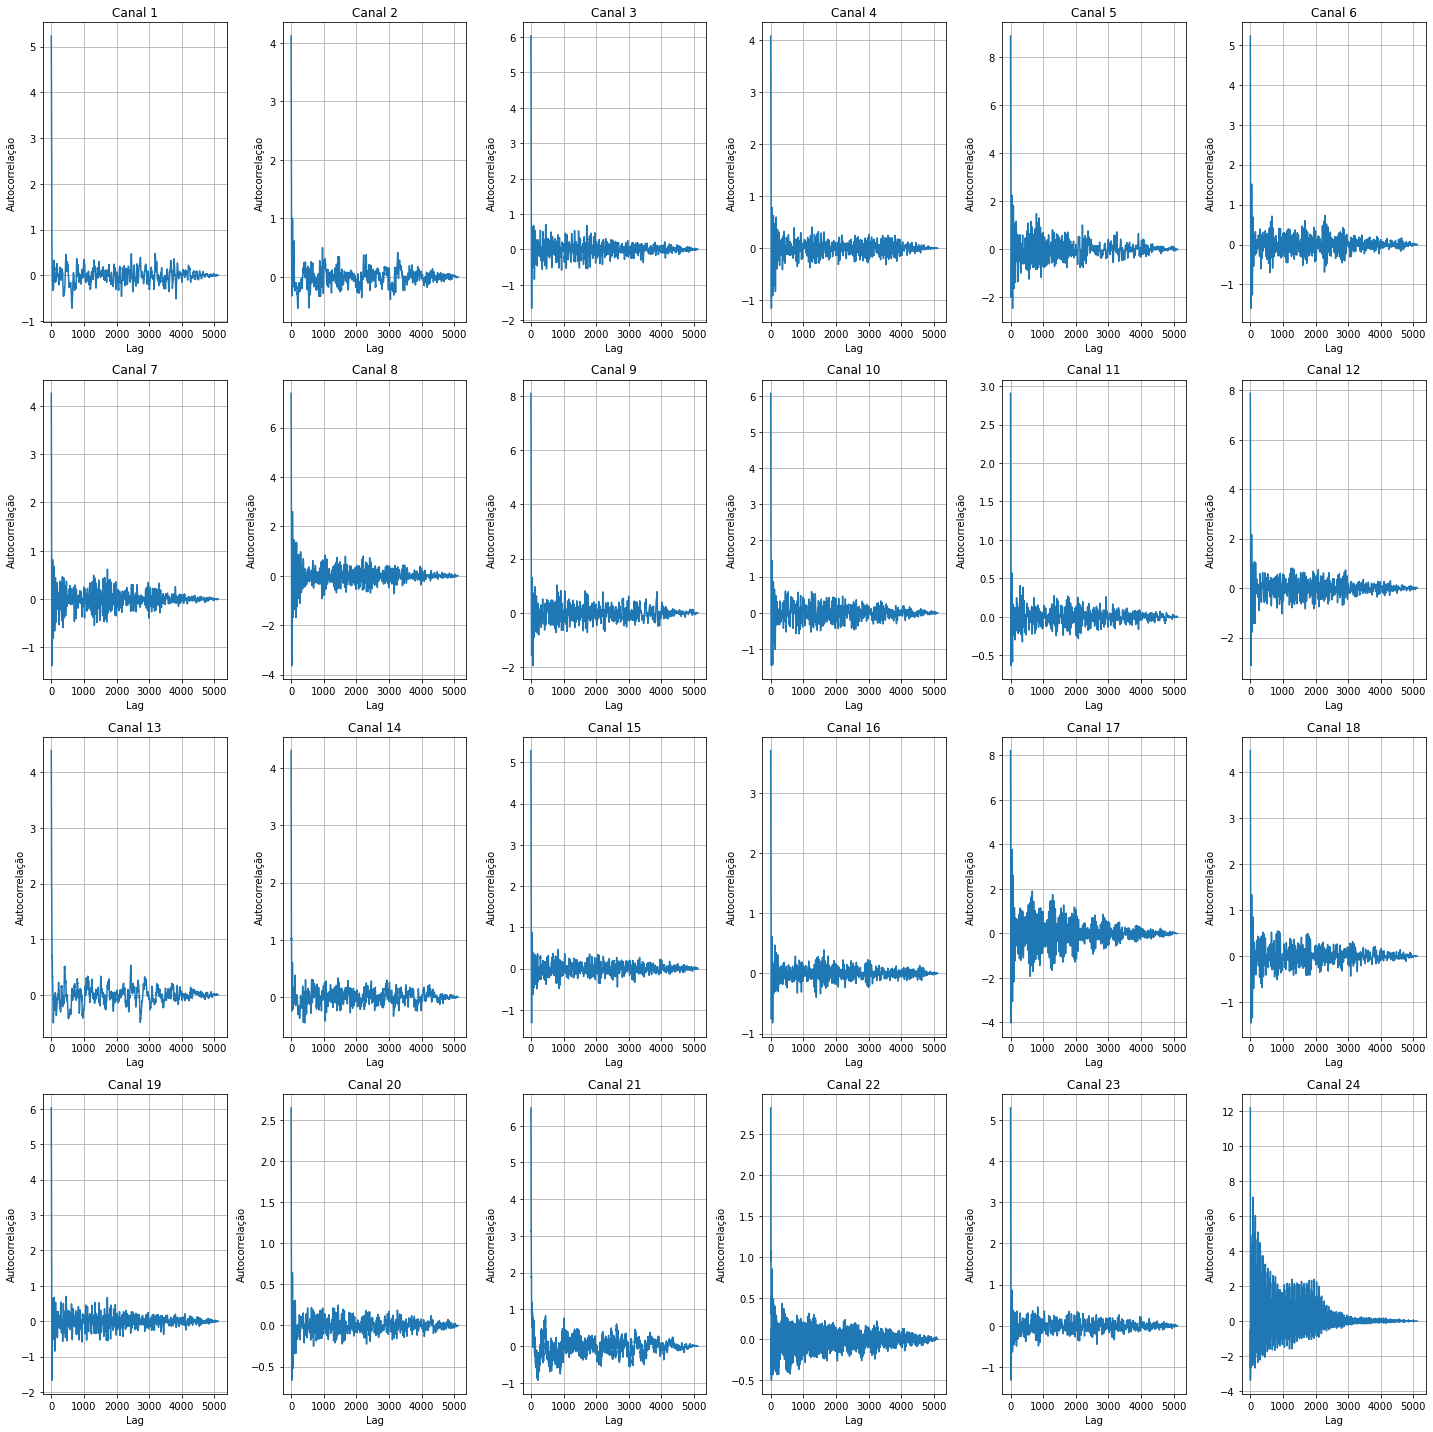

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Carregar os dados
d1 = np.loadtxt('d1.dat')
d2 = np.loadtxt('d2.dat')
d3 = np.loadtxt('d3.dat')

# Taxa de amostragem (Hz)
fs = 256

# Calcular a função de autocorrelação para cada canal
autocorr_d1 = np.zeros((24, 5120))
autocorr_d2 = np.zeros((24, 5120))
autocorr_d3 = np.zeros((24, 5120))

for i in range(24):
    autocorr_d1[i] = np.correlate(d1[i], d1[i], mode='full')[-5120:] / (5120 * fs)
    autocorr_d2[i] = np.correlate(d2[i], d2[i], mode='full')[-5120:] / (5120 * fs)
    autocorr_d3[i] = np.correlate(d3[i], d3[i], mode='full')[-5120:] / (5120 * fs)

# Configurar a figura e os subplots
fig, axs = plt.subplots(4, 6, figsize=(20, 20))

# Plotar a função de autocorrelação para cada canal
canal = 0
for i in range(4):
    for j in range(6):
        axs[i, j].plot(autocorr_d1[canal])
        axs[i, j].set_title(f'Canal {canal+1}')
        axs[i, j].set_xlabel('Lag')
        axs[i, j].set_ylabel('Autocorrelação')
        axs[i, j].grid(True)
        canal += 1

# Ajustar o espaçamento entre os subplots
plt.tight_layout()

# Exibir o gráfico
plt.show()


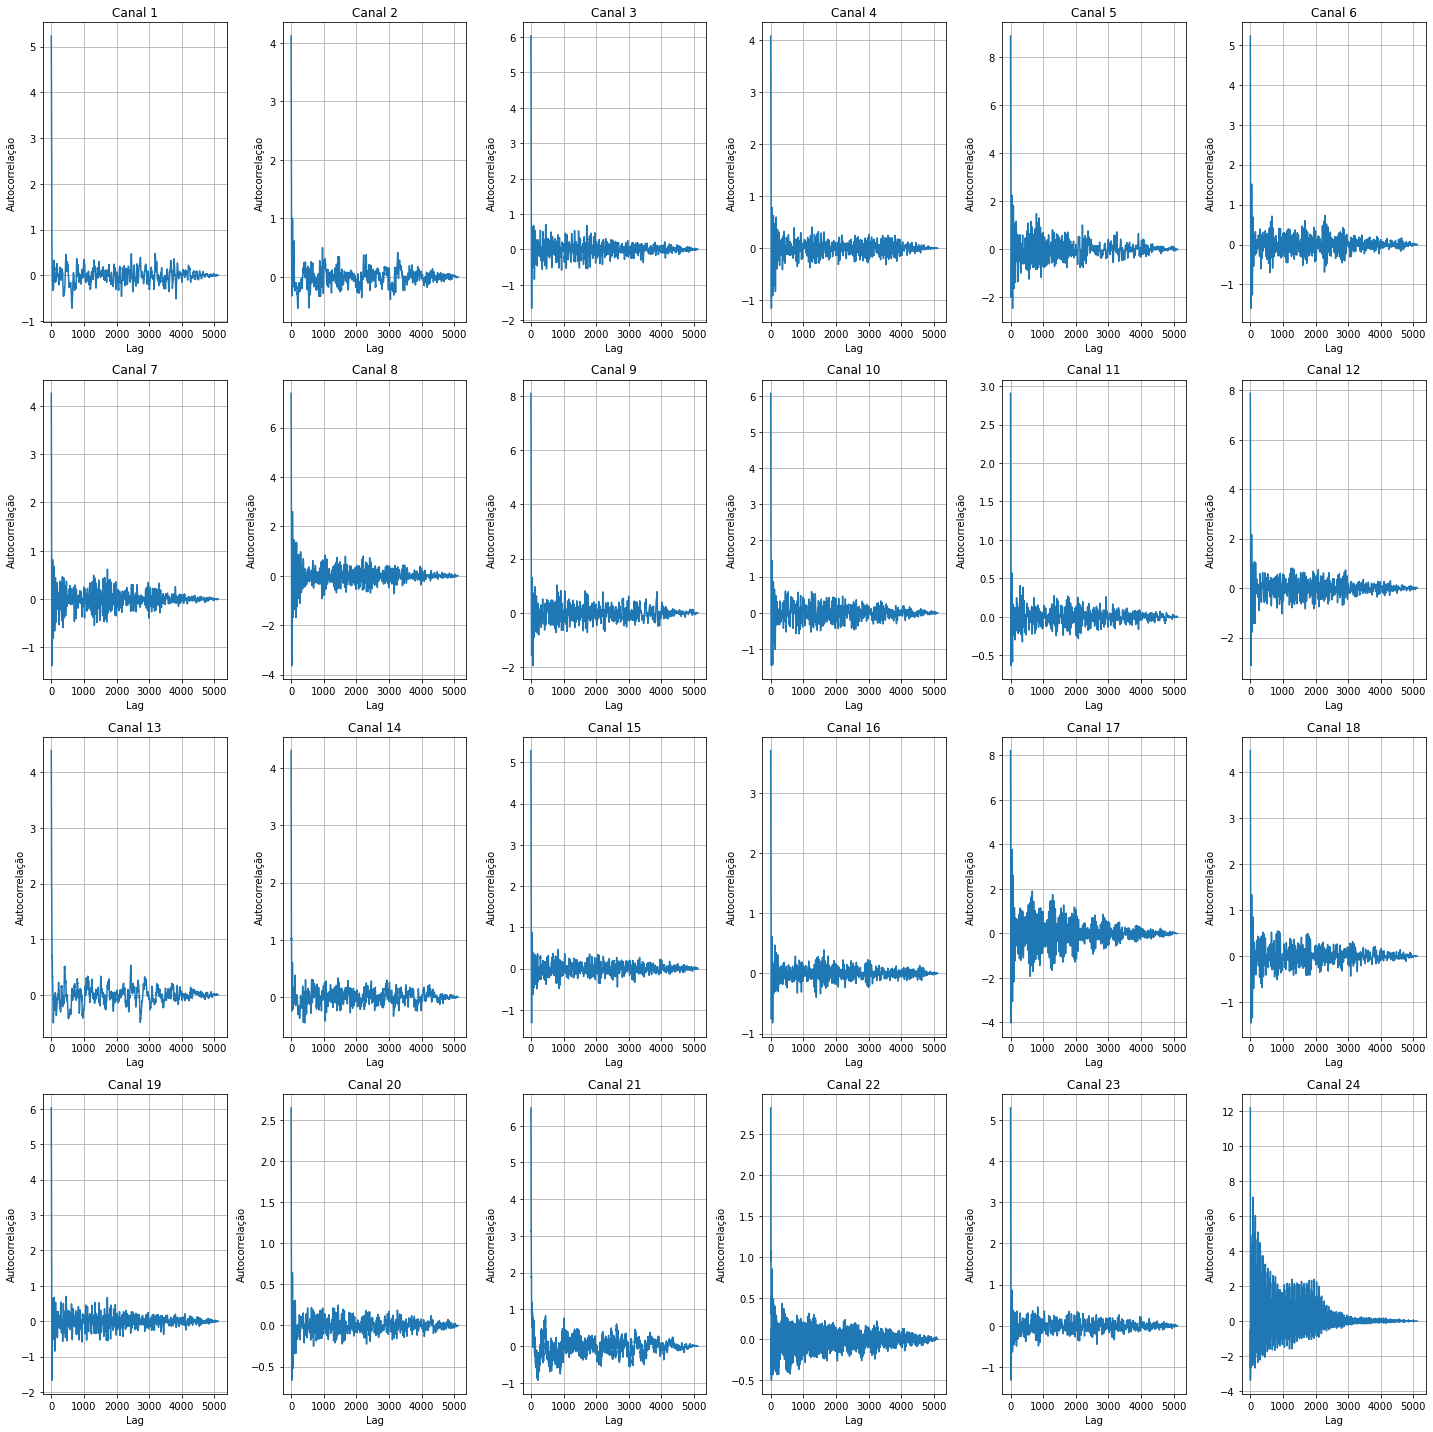

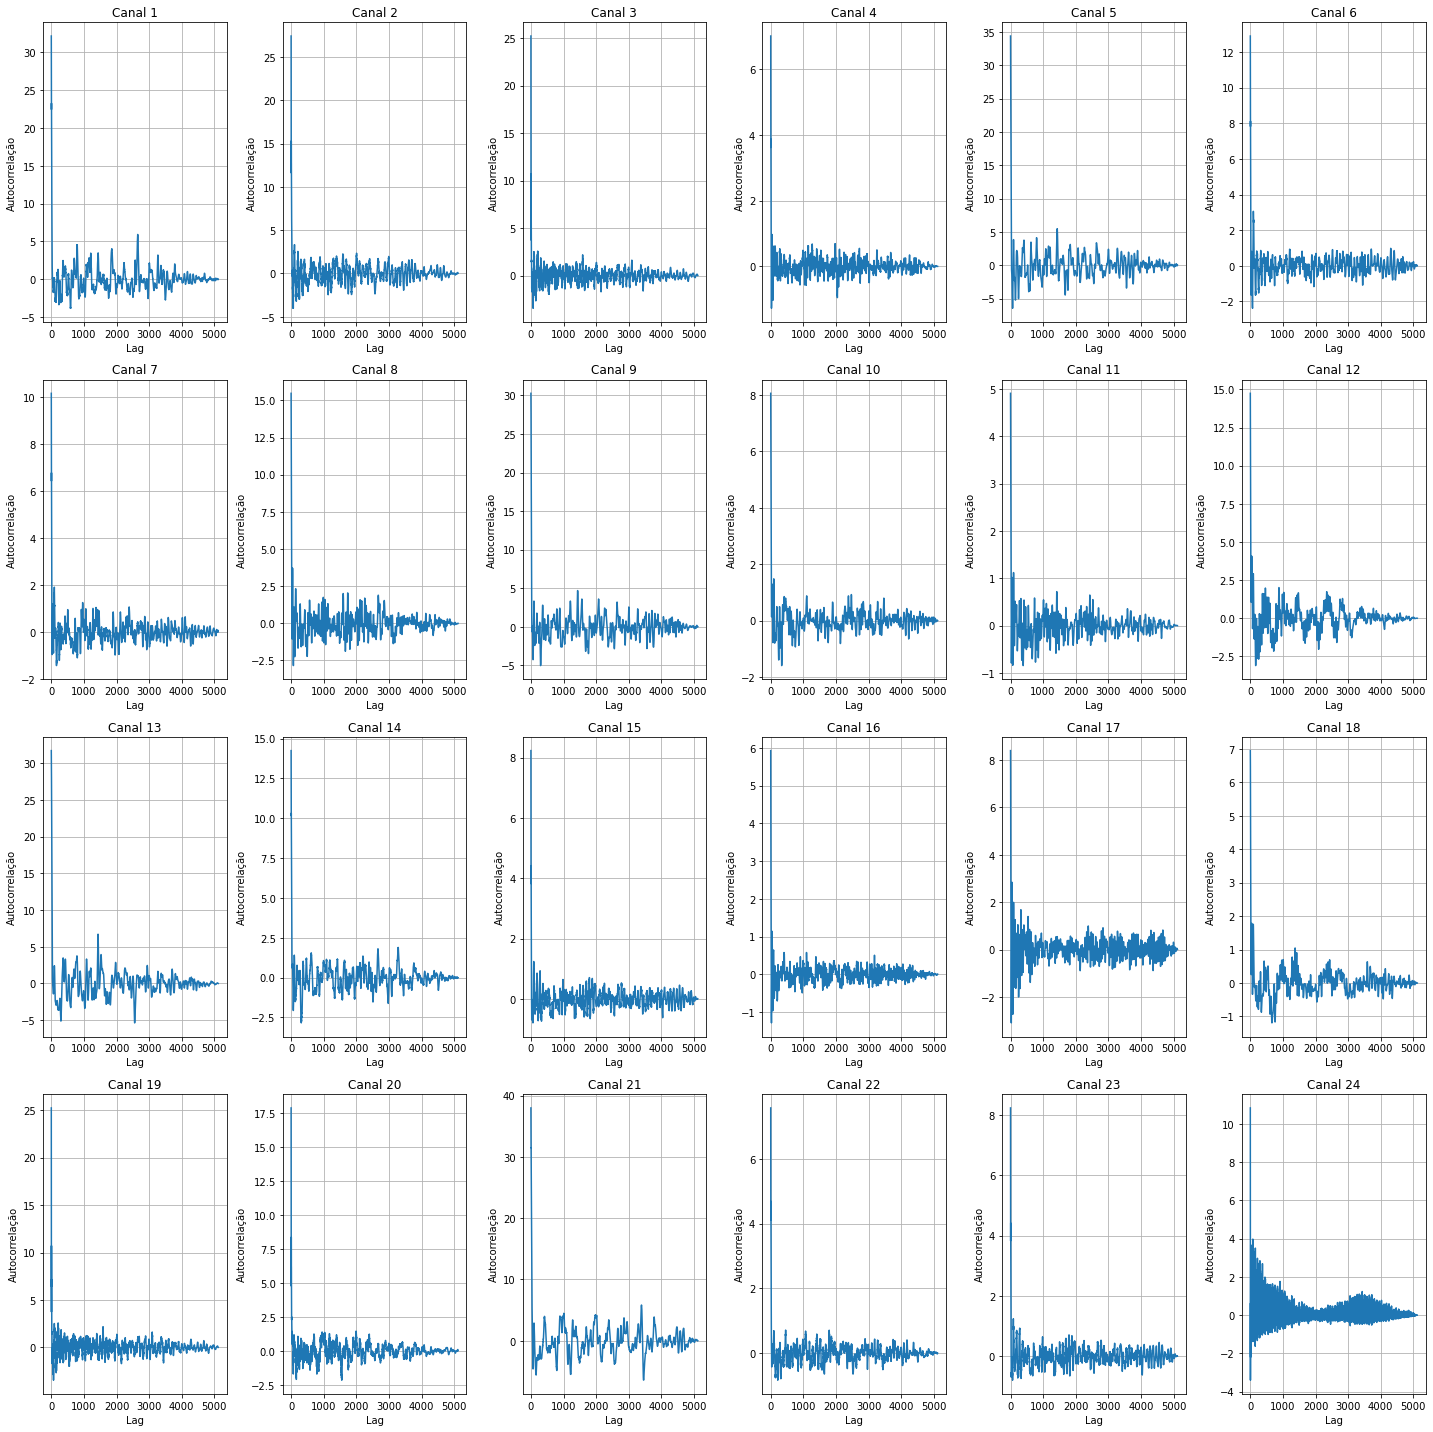

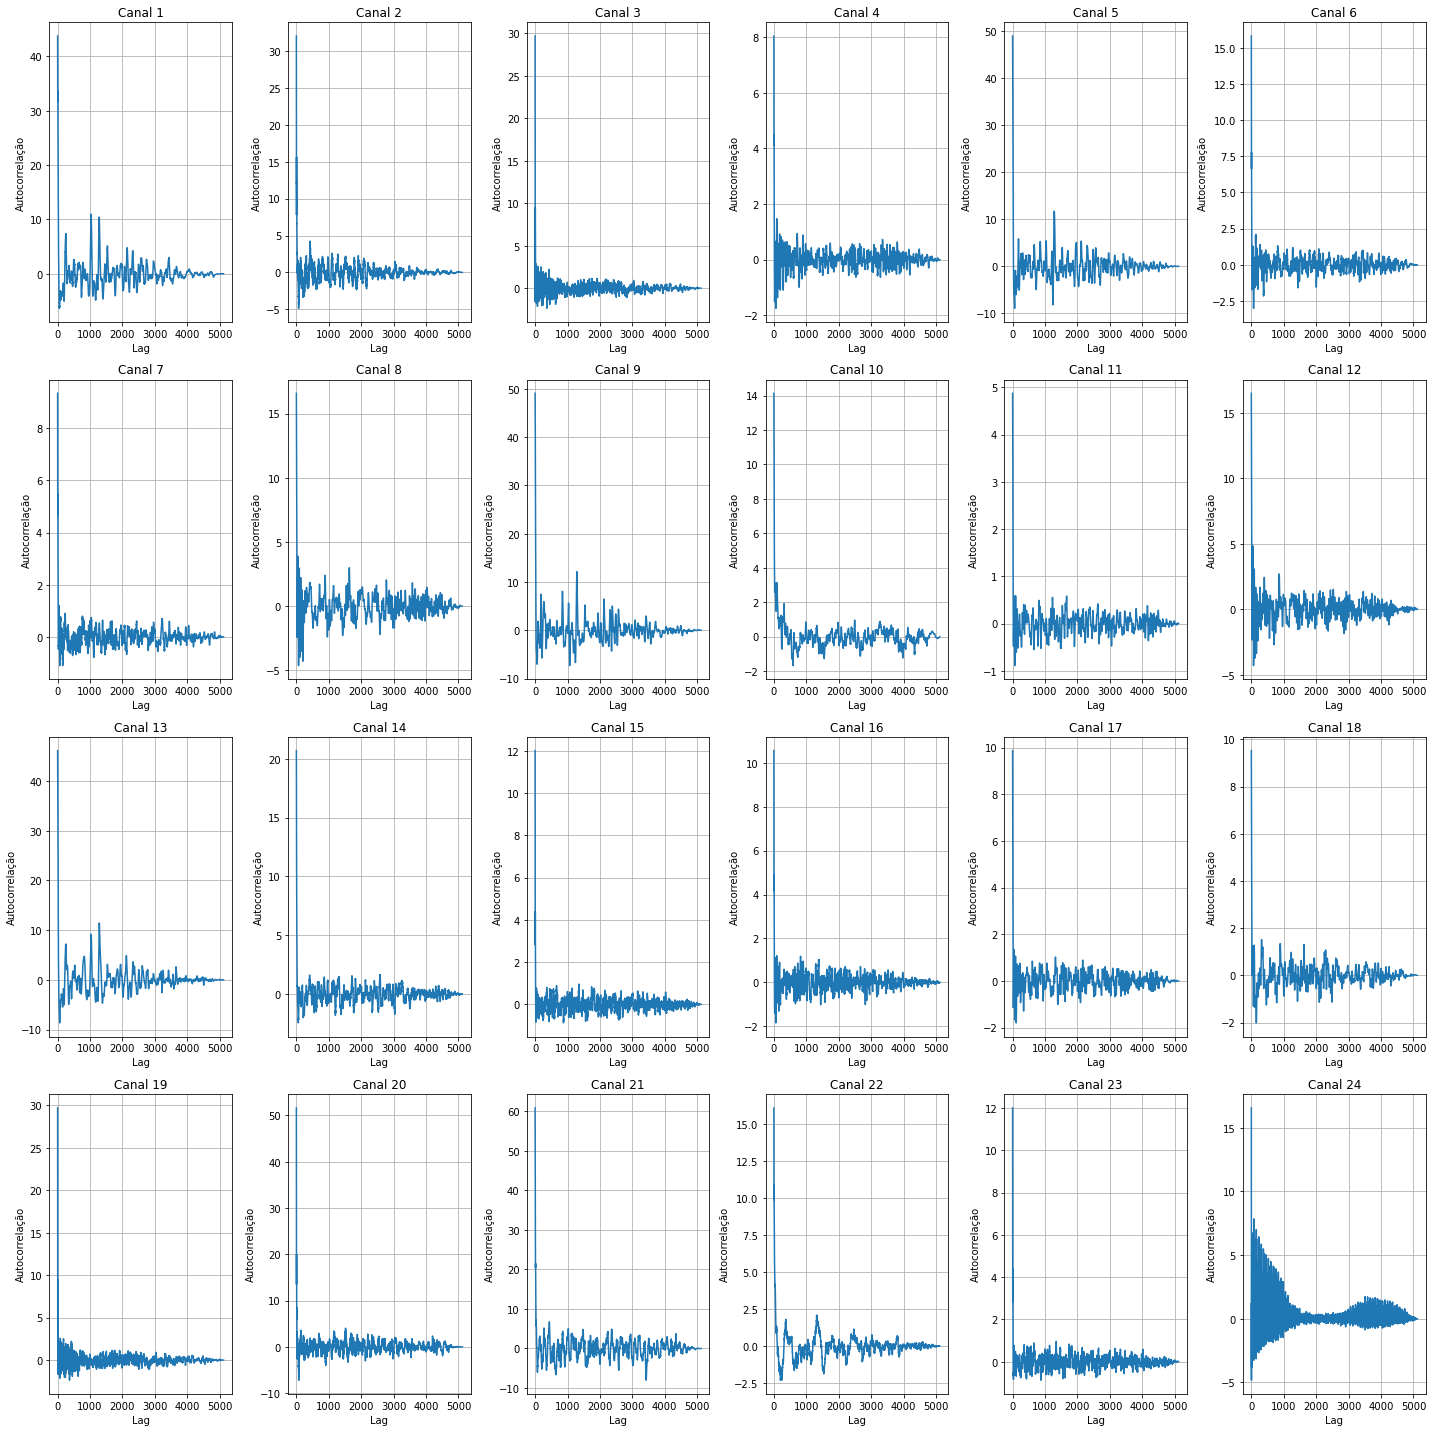

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Carregar os dados
d_files = ['d1.dat', 'd2.dat', 'd3.dat']

# Taxa de amostragem (Hz)
fs = 256

for d_file in d_files:
    # Carregar o dado
    data = np.loadtxt(d_file)

    # Calcular a função de autocorrelação para cada canal
    autocorr_data = np.zeros((24, 5120))
    
    for i in range(24):
        autocorr_data[i] = np.correlate(data[i], data[i], mode='full')[-5120:] / (5120 * fs)

    # Configurar a figura e os subplots
    fig, axs = plt.subplots(4, 6, figsize=(20, 20))

    # Plotar a função de autocorrelação para cada canal
    canal = 0
    for i in range(4):
        for j in range(6):
            axs[i, j].plot(autocorr_data[canal])
            axs[i, j].set_title(f'Canal {canal+1}')
            axs[i, j].set_xlabel('Lag')
            axs[i, j].set_ylabel('Autocorrelação')
            axs[i, j].grid(True)
            canal += 1

    # Ajustar o espaçamento entre os subplots
    plt.tight_layout()

    # Salvar a figura com um nome diferente para cada dado
    fig_name = f'autocorrelation_{d_file[:-4]}.png'  # Por exemplo: autocorrelation_d1.png
    plt.savefig(fig_name)
    
    # Exibir o gráfico
    plt.show()


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance

# Carregar os dados dos pacientes normais
n_files = ['n1.dat', 'n2.dat', 'n4.dat', 'n5.dat']
autocorr_normais = []

fs = 256
for n_file in n_files:
    data = np.loadtxt(n_file)
    if n_file == 'n3.dat':
        data = data[:, 1025:6145]
        
    autocorr_data = np.zeros((24, 5120))

    for i in range(24):
        autocorr_data[i] = np.correlate(data[i], data[i], mode='full')[-5120:] / (5120 * fs)

    autocorr_normais.append(autocorr_data)  # Keep the autocorrelation matrices without flattening

# Carregar os dados dos pacientes epilépticos
s_files = ['s1.dat', 's2.dat', 's3.dat', 's4.dat', 's5.dat']
autocorr_epilepticos = []

for s_file in s_files:
    data = np.loadtxt(s_file)
    if n_file == 's3.dat':
        data = data[:, 1025:6145]
    autocorr_data = np.zeros((24, 5120))

    for i in range(24):
        autocorr_data[i] = np.correlate(data[i], data[i], mode='full')[-5120:] / (5120 * fs)

    autocorr_epilepticos.append(autocorr_data)  # Keep the autocorrelation matrices without flattening

# Carregar os dados dos pacientes desconhecidos
d_files = ['d1.dat', 'd2.dat', 'd3.dat']
autocorr_desconhecidos = []

for d_file in d_files:
    data = np.loadtxt(d_file)
    autocorr_data = np.zeros((24, 5120))

    for i in range(24):
        autocorr_data[i] = np.correlate(data[i], data[i], mode='full')[-5120:] / (5120 * fs)

    autocorr_desconhecidos.append(autocorr_data)  # Keep the autocorrelation matrices without flattening

# Calculate the mean Euclidean distances between each unknown patient and the normal/epileptic patients
for i, autocorr_desconhecido_arr in enumerate(autocorr_desconhecidos):
    distancias_normais = [np.mean([distance.euclidean(autocorr_desconhecido_arr.flatten(), autocorr_normal_arr.flatten()) for autocorr_normal_arr in autocorr_normais])]
    distancias_epilepticos = [np.mean([distance.euclidean(autocorr_desconhecido_arr.flatten(), autocorr_epileptico_arr.flatten()) for autocorr_epileptico_arr in autocorr_epilepticos])]

    # Compare the mean distances and determine which group the unknown patient resembles the most
    if np.mean(distancias_normais) < np.mean(distancias_epilepticos):
        print(f"O paciente desconhecido {i+1} se assemelha mais ao grupo de pacientes normais.")
    elif np.mean(distancias_normais) > np.mean(distancias_epilepticos):
        print(f"O paciente desconhecido {i+1} se assemelha mais ao grupo de pacientes epilépticos.")
    else:
        print(f"Não é possível determinar se o paciente desconhecido {i+1} é normal ou epiléptico.")

O paciente desconhecido 1 se assemelha mais ao grupo de pacientes normais.
O paciente desconhecido 2 se assemelha mais ao grupo de pacientes normais.
O paciente desconhecido 3 se assemelha mais ao grupo de pacientes normais.


O cálculo da distância euclidiana entre as matrizes de autocorrelação do paciente desconhecido e dos pacientes normais e epilépticos, pode-se dizer que quanto menor a distância, maior a similaridade entre o paciente desconhecido e o grupo correspondente (normal ou epiléptico). Portanto, se a média das distâncias euclidianas entre o paciente desconhecido e os pacientes normais for significativamente menor do que a média das distâncias entre o paciente desconhecido e os pacientes epilépticos, isso sugere uma maior semelhança com o grupo de pacientes normais.